# **Libraries**

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score , root_mean_squared_error

# **Explanation**

In [83]:
"""

x -> features : x_train , x_test
y_actual -> target : y_train , y_test
m -> number of samples (rows)

y_prediction -> target -> prediction value

w -> weight
b -> bias

Equation of linear regression : w * x + b

y_prediction = w * x + b

error = y_actual - y_prediction


cost_function :

  for each method we implement it on multiple rows (samples) of data using for loop

        1. MSE (Mean Squared Error)
                                    equation -> (error ** 2)
                                    cost function = (1 / 2m) * sum( (y_actual - y_prediction) ** 2 )


        2. MAE (Mean Absolute Error)
                                    equation -> abs(error)
                                    cost function = (1 / m) * sum( abs(y_actual - y_prediction) )


        3. RMSE (Root Mean Squared Error)
                                    equation -> sqrt( (error ** 2) )
                                    cost function = sqrt(  (1 / m) * sum( (y_actual - y_prediction) ** 2 ) )  )


        4. R2 (R-squared)
                                    equation -> 1 - (error / (y_actual - y_mean))
                                    y_mean = total_sum(y_actual) / m
                                    cost function = 1 - (  sum( (y_actual - y_prediction) ** 2 ) / sum( (y_actual - y_mean) ** 2 ) )  )


gradients computing :

  calculate derivate of cost function wrt w and b for each y_prediction value
  with w : multiple with x_train
  with b : multiple with 1
  do not forget the (1/m) to get the average

  for each method we implement it on multiple rows (samples) of data using for loop
  there is negative cuz -> error = y_actual - y_prediction = y_actual - (w * x + b) = y_actual - w * x - b
  and we diffrentiate wrt w and b

  derivative = sum( y_actual - y_prediction )

        1. without regularization
                                    dj_dw + = (-1 / m) * derivative * x_train
                                    dj_db + = (-1 / m) * derivative

        2. with regularization

              Regularization entirely solves the problem of overfitting, but λ is what determines the strength of this solution.
              It’s like a 'control knob' that makes the model either learn more details or stay simpler and generalize better.
              so the more lambda value is the less the model complex is.

              constant = (lambda_/(2*m))

                  1. l1 : lasso -> constant * sum( abs(weights) )
                      lambda_ makes the weights = 0   :->   feature selection
                                                regularization = constant * sum( abs(w) + abs(b) )
                                                dj_dw + = (-1 / m) * derivative * x_train + regularization
                                                dj_db + = (-1 / m) * derivative + regularization


                  2. l2 : ridge -> constant * sum( weights ** 2 )
                    lambda_ makes the weights very small   :->   shrinkage
                                                regularization = constant * sum(  ( w ** 2 ) + ( b ** 2 )  )
                                                dj_dw + = (-1 / m) * derivative * x_train + regularization
                                                dj_db + = (-1 / m) * derivative + regularization



updating the weights :

  we update the weights to try to get the minimum loss.
  but it is not enought to calculate the gradients only.
  we have to multiple it with learning_rate.
  learning rate determines the step size in the weight update.

  when choosing small value of learning rate , we increase the number of iterations , higher computational expensive.

  when choosing large value of learning rate , it may end with overshooting , the model go far away from the globel minimum
  do the model might not get the minimum cost loss at all!

  after choosing good value of learning_rate and multiple it with the gradients,
  we update the weights and biases.

  we subtract the gradients from the old weights and biases cuz :
    in the loss vs weights graph , we see that
    the model is in the left or the right side of the global minimum value

        - if the model is in the left side of global minimum value , dj_dw -> -ve , dj_db -> -ve
            so w_new > w_old : now the model will move right

        - if the model is in the right side of global minimum value , dj_dw -> +ve , dj_db -> +ve
            so w_new < w_old : now the model will move left

                          w_new = w_old - learning_rate * dj_dw
                          b_new = b_old - learning_rate * dj_db

"""


"\n\nx -> features : x_train , x_test\ny_actual -> target : y_train , y_test\nm -> number of samples (rows)\n\ny_prediction -> target -> prediction value\n\nw -> weight\nb -> bias\n\nEquation of linear regression : w * x + b\n\ny_prediction = w * x + b\n\nerror = y_actual - y_prediction\n\n\ncost_function :\n\n  for each method we implement it on multiple rows (samples) of data using for loop\n\n        1. MSE (Mean Squared Error)\n                                    equation -> (error ** 2)\n                                    cost function = (1 / 2m) * sum( (y_actual - y_prediction) ** 2 )\n\n\n        2. MAE (Mean Absolute Error)\n                                    equation -> abs(error)\n                                    cost function = (1 / m) * sum( abs(y_actual - y_prediction) )\n\n\n        3. RMSE (Root Mean Squared Error)\n                                    equation -> sqrt( (error ** 2) )\n                                    cost function = sqrt(  (1 / m) * sum( (y_actua

# **Manual Implementation**

In [84]:
def fun_linear_regression(x , w , b):
  if np.isscalar(w):
    Y_prediction = np.sum(w * x, axis=1) + b
  else:
    Y_prediction =  np.dot(x, w) + b

  return Y_prediction

In [85]:
def cost_function(Y_prediction , Y_train , m , fun_type = 'MSE'):
  total_cost = 0
  if fun_type == 'MSE':
    cost = (Y_prediction - Y_train) ** 2
    total_cost = total_cost + cost

    total_cost = total_cost * (1/(2*m))

  elif fun_type == 'MAE':
    cost = abs(Y_prediction - Y_train)
    total_cost = total_cost + cost

    total_cost = total_cost * (1/m)

  elif fun_type == 'RMSE':
    cost = (Y_prediction - Y_train) ** 2
    total_cost = total_cost + cost

    total_cost = np.sqrt(total_cost * (1/m))


  elif fun_type == 'r2':
    equation1_cost = 0
    equation2_mean = 0
    equation1_cost = equation1_cost + ((Y_prediction - Y_train) ** 2)
    equation2_mean = equation2_mean + ((Y_prediction - Y_train) ** 2)

    total_cost = 1 - (equation1_cost / equation2_mean)

  return total_cost

In [86]:
def regularization(w , b , m , lambda_ , reg_type = 'l1'):

  regularization_term = 0
  constant = (lambda_/(2*m))

  if reg_type == 'l1':
    weights = abs(w)  + abs(b)
  elif reg_type == 'l2':
    weights = (w**2 + b**2)
  else:
    raise ValueError("Invalid regularization type. Use 'l1' or 'l2'.")

    regularization_term = regularization_term + weights

  regularization_term = constant * regularization_term

  return regularization_term

In [87]:
def gradient_computing(Y_prediction , Y_train , X_train , m , w = None , b = None , with_or_without_reg = 'without' , lambda_ = None):
  dj_dw = 0
  dj_db = 0
  error = (Y_train - Y_prediction)

  dj_dw = (-1 * np.sum(np.dot(X_train.T, error)))
  dj_db = (-1 * np.sum(error))

  dj_dw = dj_dw * (1/m)
  dj_db = dj_db * (1/m)


  if with_or_without_reg == 'with-l1':
    regularization_term = regularization(w , b , m , lambda_ , 'l1')

    dj_dw = dj_dw + regularization_term
    dj_db = dj_db + regularization_term


  elif  with_or_without_reg == 'with-l2':
    regularization_term = regularization(w , b , m , lambda_ , 'l2')

    dj_dw = dj_dw + regularization_term
    dj_db = dj_db + regularization_term

  return dj_dw , dj_db

In [88]:
def update(w , b , alpha , dj_dw , dj_db):
  w_new = w - alpha * dj_dw
  b_new = b - alpha * dj_db

  return w_new , b_new

In [89]:
def model(X_train , Y_train , w , b , alpha , cost_function_type , iter):
  j_history = []
  w_history = []
  b_history = []
  m = X_train.shape[0]
  for i in range(iter):

    Y_prediction = fun_linear_regression(X_train , w , b)

    total_cost = cost_function(Y_prediction , Y_train , m , cost_function_type)
    j_history.append(total_cost)

    dj_dw , dj_db = gradient_computing(Y_prediction , Y_train , X_train , m , w = None , b = None , with_or_without_reg = 'without' , lambda_ = None)

    w , b = update(w , b , alpha , dj_dw , dj_db)
    w_history.append(w)
    b_history.append(b)

  print('without regularization')
  print(f'iteration {iter}: Total cost = {total_cost}, w = {w}, b = {b}' , end='\n\n')

  print(end = '\n\n\n')

  return w , b , j_history , w_history , b_history

In [90]:
def model_l1(X_train , Y_train , w , b , alpha , cost_function_type , lambda_ , iter):
  j_history = []
  w_history = []
  b_history = []
  m = X_train.shape[0]
  for i in range(iter):

    Y_prediction = fun_linear_regression(X_train , w , b)

    total_cost = cost_function(Y_prediction , Y_train , m , cost_function_type)
    j_history.append(total_cost)

    dj_dw , dj_db = gradient_computing(Y_prediction , Y_train , X_train , m , w = w , b = b , with_or_without_reg = 'with-l1' , lambda_ = lambda_)

    w , b = update(w , b , alpha , dj_dw , dj_db)
    w_history.append(w)
    b_history.append(b)

  print('with lasso regularization')
  print(f'iteration {iter}: Total cost = {total_cost}, w = {w}, b = {b}' , end='\n\n')

  print(end = '\n\n\n')

  return w , b , j_history , w_history , b_history

In [91]:
def model_l2(X_train , Y_train , w , b , alpha , cost_function_type , lambda_ , iter):
  j_history = []
  w_history = []
  b_history = []
  m = X_train.shape[0]
  for i in range(iter):

    Y_prediction = fun_linear_regression(X_train , w , b)

    total_cost = cost_function(Y_prediction , Y_train , m , cost_function_type)
    j_history.append(total_cost)

    dj_dw , dj_db = gradient_computing(Y_prediction , Y_train , X_train , m , w = w , b = b , with_or_without_reg = 'with-l2' , lambda_ = lambda_)

    w , b = update(w , b , alpha , dj_dw , dj_db)
    w_history.append(w)
    b_history.append(b)

  print('with ridge regularization')
  print(f'iteration {iter}: Total cost = {total_cost}, w = {w}, b = {b}' , end='\n\n')

  print(end = '\n\n\n')

  return w , b , j_history , w_history , b_history

# **Example**

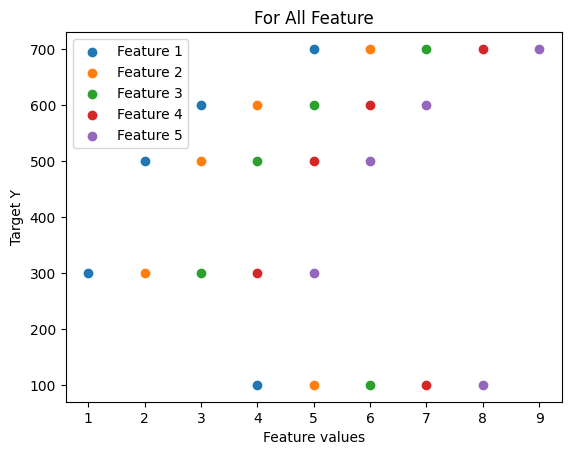

In [92]:
X_train = np.array([
                    [1,2,3,4,5],
                    [2,3,4,5,6],
                    [3,4,5,6,7],
                    [4,5,6,7,8],
                    [5,6,7,8,9]
                    ])

Y_train = np.array([300, 500 , 600 , 100 , 700])

for i in range(X_train.shape[1]):
  plt.scatter(X_train[:, i], Y_train, label=f'Feature {i+1}')
plt.title("For All Feature")
plt.xlabel("Feature values")
plt.ylabel("Target Y")
plt.legend()
plt.show()

# print(f'shape of X_train and Y_train: {X_train.shape}')
# plt.scatter(X_train, Y_train)
# plt.plot(X_train, Y_train, c = "r")
# plt.show()

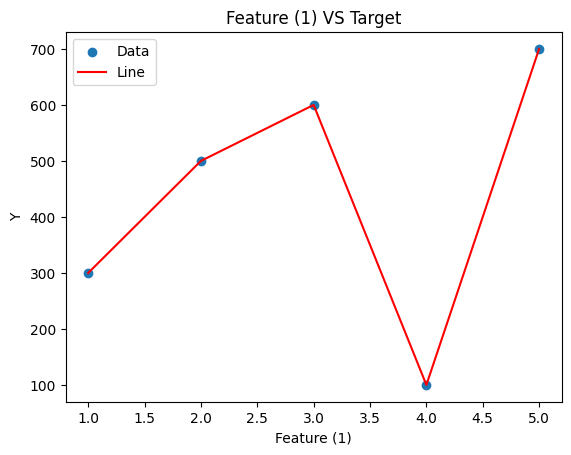

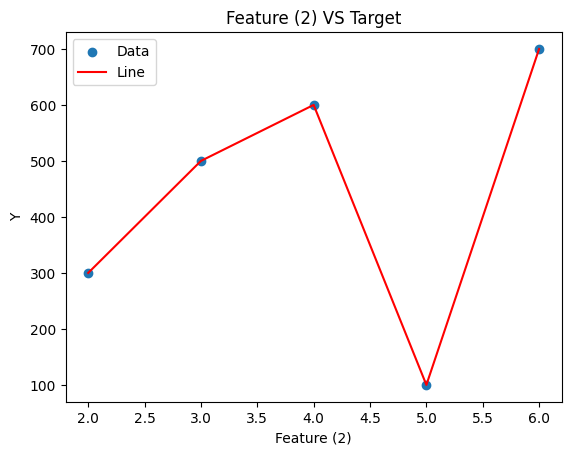

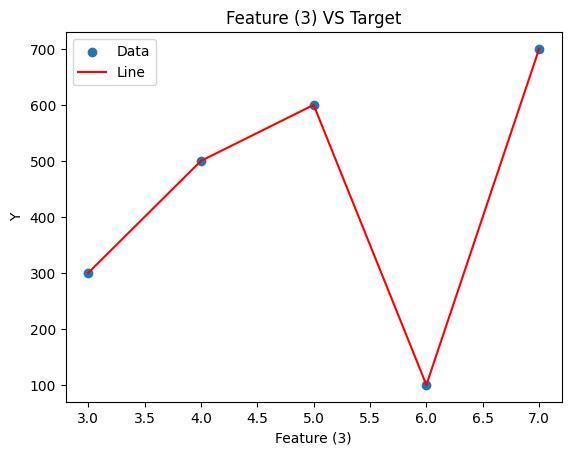

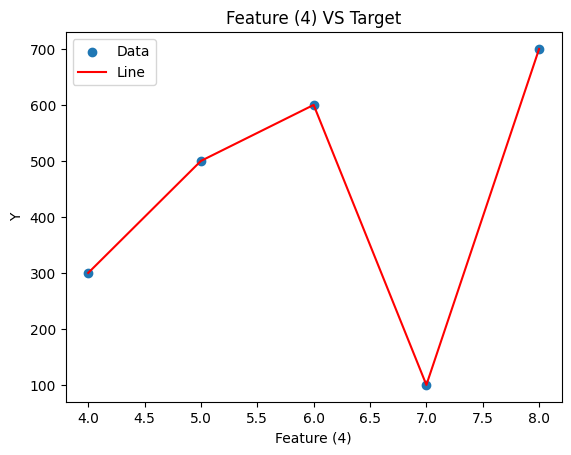

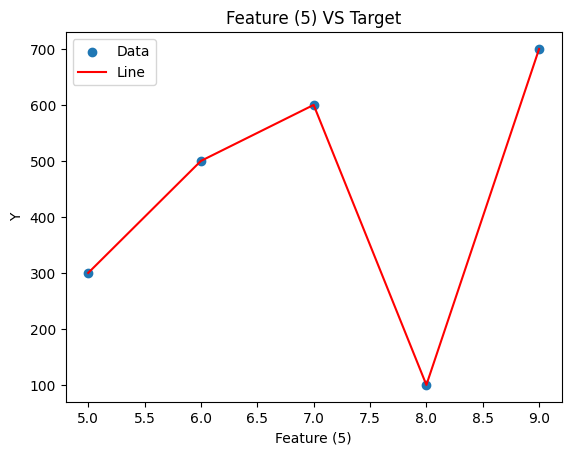

In [93]:
for i in (range(X_train.shape[1])):
  plt.scatter(X_train[:,i], Y_train, label="Data")
  plt.plot(X_train[:,i], Y_train, c="r", label="Line")
  plt.title(f"Feature ({i + 1}) VS Target")
  plt.xlabel(f"Feature ({i + 1})")
  plt.ylabel("Y")
  plt.legend()
  plt.show()

[0 0 0 0 0]


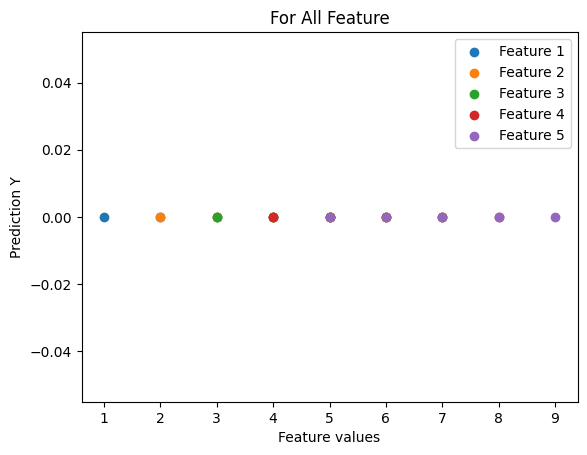

In [94]:
m = m = X_train.shape[0] # number of samples
Y_prediction = np.zeros(X_train.shape) # target -> prediction value

w = 0 # weight
b = 0 # bias
Y_prediction = fun_linear_regression(X_train, w, b)

print(Y_prediction)

for i in range(X_train.shape[1]):
  plt.scatter(X_train[:, i], Y_prediction, label=f'Feature {i+1}')
plt.title("For All Feature")
plt.xlabel("Feature values")
plt.ylabel("Prediction Y")
plt.legend()
plt.show()

# plt.scatter(X_train, Y_train)
# plt.plot(X_train, Y_prediction, c = "r")
# plt.show()

In [95]:
total_cost_mse = cost_function(Y_prediction , Y_train , m , 'MSE')
print('MSE = ' + str(total_cost_mse) , end = '\n\n')

total_cost_mae = cost_function(Y_prediction , Y_train , m , 'MAE')
print('MAE = ' + str(total_cost_mae) , end= '\n\n')

total_cost_rmse = cost_function(Y_prediction , Y_train , m , 'RMSE')
print('RMSE = ' + str(total_cost_rmse) , end = '\n\n')

total_cost_r2 = cost_function(Y_prediction , Y_train , m , 'r2')
print('R2 = ' + str(total_cost_r2) , end = '\n\n')

MSE = [ 9000. 25000. 36000.  1000. 49000.]

MAE = [ 60. 100. 120.  20. 140.]

RMSE = [134.16407865 223.60679775 268.3281573   44.72135955 313.04951685]

R2 = [0. 0. 0. 0. 0.]



In [96]:
regularization_term_l1 = regularization(w , b , m , 0.01 , 'l1')
print(f"Regularization Term: {regularization_term_l1}")

regularization_term_l2 = regularization(w , b , m , 0.01 , 'l2')
print(f"Regularization Term: {regularization_term_l2}")

Regularization Term: 0.0
Regularization Term: 0.0


In [97]:
dj_dw , dj_db = gradient_computing(Y_prediction , Y_train , X_train , m)
print(f"Derivative of cost function for w: {dj_dw}")
print(f"Derivative of cost function for b: {dj_db}" , end = '\n\n')

dj_dw_l1 , dj_db_l1 = gradient_computing(Y_prediction , Y_train , X_train , m , w , b , 'with-l1' , 0.01)
print(f"Derivative of cost function for w: {dj_dw_l1}")
print(f"Derivative of cost function for b: {dj_db_l1}" , end = '\n\n')

dj_dw_l2 , dj_db_l2 = gradient_computing(Y_prediction , Y_train , X_train , m , w , b , 'with-l2' , 0.01)
print(f"Derivative of cost function for w: {dj_dw_l2}")
print(f"Derivative of cost function for b: {dj_db_l2}" , end = '\n\n')

Derivative of cost function for w: -11400.0
Derivative of cost function for b: -440.0

Derivative of cost function for w: -11400.0
Derivative of cost function for b: -440.0

Derivative of cost function for w: -11400.0
Derivative of cost function for b: -440.0



In [98]:
print(f"new w , b: {update(w , b , 0.01 , dj_dw , dj_db)}" )

new w , b: (np.float64(114.0), np.float64(4.4))


# **Data Analyzing , Cleaning , Preprocessing , Spliting , ...**

In [144]:
data_frame = pd.read_csv("houses.txt", delimiter=",")

In [145]:
data_frame.shape

(99, 5)

In [146]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   9.520000000000000000e+02  99 non-null     float64
 1   2.000000000000000000e+00  99 non-null     float64
 2   1.000000000000000000e+00  99 non-null     float64
 3   6.500000000000000000e+01  99 non-null     float64
 4   2.715000000000000000e+02  99 non-null     float64
dtypes: float64(5)
memory usage: 4.0 KB


In [147]:
data_frame.describe()

,9.520000000000000000e+02,2.000000000000000000e+00,1.000000000000000000e+00,6.500000000000000000e+01,2.715000000000000000e+02
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1418.373737,2.717172,1.383838,38.383838,363.156081
std,413.710378,0.655283,0.488794,25.909067,104.722890
min,788.000000,0.000000,1.000000,12.000000,158.000000
25%,1094.000000,2.000000,1.000000,17.000000,289.152000
50%,1419.000000,3.000000,1.000000,25.000000,354.000000
75%,1658.000000,3.000000,2.000000,57.000000,426.490000
max,3194.000000,4.000000,2.000000,107.000000,718.200000


In [148]:
for col in data_frame.columns:
  print(f"{col} \n Number of unique values {data_frame[col].nunique()} \n Unique values : \n {data_frame[col].unique()}" , end = '\n\n')

9.520000000000000000e+02 
 Number of unique values 83 
 Unique values : 
 [1244. 1947. 1725. 1959. 1314.  864. 1836. 1026. 3194.  788. 1200. 1557.
 1430. 1220. 1092.  848. 1682. 1768. 1040. 1652. 1088. 1316. 1593.  972.
 1097. 1004.  904. 1694. 1073. 1419. 1164. 1935. 1216. 2482. 1840. 1851.
 1660. 1096. 1775. 2030. 1784. 1552. 1953. 1224. 1616.  816. 1349. 1571.
 1486. 1506. 1764. 1208. 1470. 1654. 1029. 1120. 1150. 1392. 1603. 1215.
 2599. 1431. 2090. 1790. 1484. 1159. 1547. 1983. 1056. 1180. 1358.  960.
 1456. 1446. 1553.  882.  803. 1656. 1541.  948. 1432. 1212. 1050.]

2.000000000000000000e+00 
 Number of unique values 5 
 Unique values : 
 [3. 2. 4. 1. 0.]

1.000000000000000000e+00 
 Number of unique values 2 
 Unique values : 
 [1. 2.]

6.500000000000000000e+01 
 Number of unique values 49 
 Unique values : 
 [ 64.  17.  42.  15.  14.  66.  43.  87.  80.  18.  20.  23.  44.  21.
  35.  73.  37.  51.  55.  13. 100.  19.  52.  12.  74.  16.  57.  97.
  28.  45. 107.  58.  27.  24.

In [149]:
data_frame['6.500000000000000000e+01'] = data_frame['6.500000000000000000e+01'].astype(int)
data_frame['1.000000000000000000e+00'] = data_frame['1.000000000000000000e+00'].astype(int)
data_frame['2.000000000000000000e+00'] = data_frame['2.000000000000000000e+00'].astype(int)
data_frame['9.520000000000000000e+02'] = data_frame['9.520000000000000000e+02'].astype(int)

In [150]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   9.520000000000000000e+02  99 non-null     int64  
 1   2.000000000000000000e+00  99 non-null     int64  
 2   1.000000000000000000e+00  99 non-null     int64  
 3   6.500000000000000000e+01  99 non-null     int64  
 4   2.715000000000000000e+02  99 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [151]:
features = data_frame.iloc[:, :-1]
target = data_frame.iloc[:, -1]

In [152]:
print(f"Features Shape \n : {features.shape}")
print(f"Target Shape \n : {target.shape}")

Features Shape 
 : (99, 4)
Target Shape 
 : (99,)


In [153]:
print(f"Features \n : {features}")
# print(f"Target \n : {target}"

Features 
 :     9.520000000000000000e+02  2.000000000000000000e+00  \
0                       1244                         3   
1                       1947                         3   
2                       1725                         3   
3                       1959                         3   
4                       1314                         2   
..                       ...                       ...   
94                      1224                         2   
95                      1432                         2   
96                      1660                         3   
97                      1212                         3   
98                      1050                         2   

    1.000000000000000000e+00  6.500000000000000000e+01  
0                          1                        64  
1                          2                        17  
2                          2                        42  
3                          2                        15  
4    

In [154]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.2 , random_state = 42)

In [155]:
print(x_train)

    9.520000000000000000e+02  2.000000000000000000e+00  \
49                      1571                         3   
70                      1790                         4   
68                      1431                         3   
15                       848                         1   
39                      1775                         3   
..                       ...                       ...   
60                      1150                         3   
71                      1484                         3   
14                      1092                         2   
92                      1541                         3   
51                      1506                         2   

    1.000000000000000000e+00  6.500000000000000000e+01  
49                         1                        14  
70                         2                        49  
68                         1                        59  
15                         1                        17  
39                

In [156]:
# columns = ['6.500000000000000000e+01' , '9.520000000000000000e+02']
# scaler = StandardScaler()
# for col in columns:
#   x_train[col] = scaler.fit_transform(x_train[[col]])
#   x_test[col] = scaler.fit_transform(x_test[[col]])

In [157]:
# x_train['6.500000000000000000e+01']

# **Task**

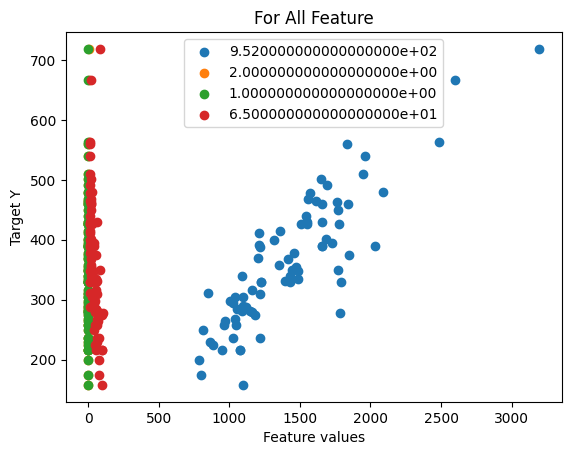

In [172]:
for col in x_train.columns:
  plt.scatter(x_train[col], y_train, label=f'{col}')
plt.title("For All Feature")
plt.xlabel("Feature values")
plt.ylabel("Target Y")
plt.legend()
plt.show()

In [181]:
w = 10
b = 10
alpha = 0.1
cost_function_type = 'MSE'
iter = 10

w_new , b_new , j_history , w_history , b_history = model(x_train , y_train , w , b , alpha , cost_function_type , iter)

without regularization
iteration 10: Total cost = 49    5.487023e+102
70    7.397444e+102
68    4.850541e+102
15    1.633531e+102
39    7.103719e+102
          ...      
60    3.213337e+102
71    4.922231e+102
14    2.919147e+102
92    5.295352e+102
51    5.053924e+102
Length: 79, dtype: float64, w = 4.286796625382843e+54, b = 2.7087546196749195e+51






49    6.811723e+57
70    7.909142e+57
68    6.404477e+57
15    3.716655e+57
39    7.750531e+57
          ...     
60    5.212747e+57
71    6.451632e+57
14    4.968400e+57
92    6.691692e+57
51    6.537368e+57
Length: 79, dtype: float64


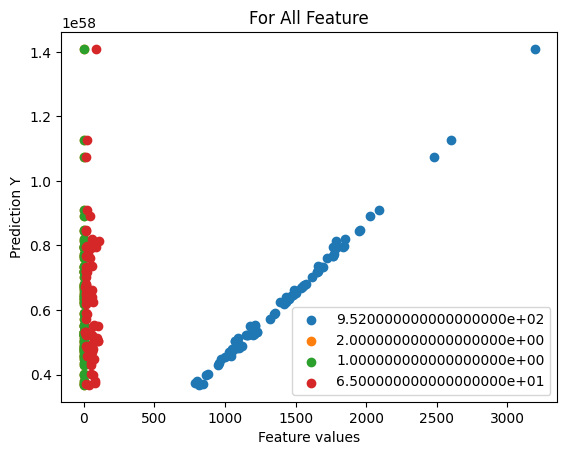

In [186]:
m = m = x_train.shape[0] # number of samples
Y_prediction = np.zeros(x_train.shape) # target -> prediction value

Y_prediction = fun_linear_regression(x_train, w_new, b_new)

print(Y_prediction)

for col in x_train.columns:
  plt.scatter(x_train[col], Y_prediction, label=f'{col}')
plt.title("For All Feature")
plt.xlabel("Feature values")
plt.ylabel("Prediction Y")
plt.legend()
plt.show()

# plt.scatter(X_train, Y_train)
# plt.plot(X_train, Y_prediction, c = "r")
# plt.show()

In [188]:
error = y_train - Y_prediction
error

total_cost = cost_function(Y_prediction , y_train , m , 'r2')
total_cost

,0
49,0.0
70,0.0
68,0.0
15,0.0
39,0.0
...,...
60,0.0
71,0.0
14,0.0
92,0.0


# **Task with Scikit-Learn**

In [164]:
linear_regression_model = LinearRegression()
lasso_model = Lasso(alpha = 0.1)
ridge_model = Ridge(alpha = 0.1)

In [165]:
linear_regression_model.fit(x_train , y_train)
lasso_model.fit(x_train , y_train)
ridge_model.fit(x_train , y_train)

y_pred_train_lr = linear_regression_model.predict(x_train)
y_pred_lr = linear_regression_model.predict(x_test)

y_pred_train_lasso = lasso_model.predict(x_train)
y_pred_lasso = lasso_model.predict(x_test)

y_pred_train_ridge = ridge_model.predict(x_train)
y_pred_ridge = ridge_model.predict(x_test)

In [160]:
print('Linear Regression')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('Mean Absolute Error:' , mean_absolute_error(y_test , y_pred_lr))
print('R2 Train Score:', r2_score(y_train, y_pred_train_lr))
print('R2 Test Score:', r2_score(y_test, y_pred_lr))

Linear Regression
Mean Squared Error: 537.0021679015775
Mean Absolute Error: 18.00870342818793
R2 Train Score: 0.9624745110202657
R2 Test Score: 0.9432396579672923


In [166]:
print('Lasso Regularization')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))
print('Mean Absolute Error:' , mean_absolute_error(y_test , y_pred_lasso))
print('R2 Train Score:', r2_score(y_train, y_pred_train_lasso))
print('R2 Test Score:', r2_score(y_test, y_pred_lasso))

Lasso Regularization
Mean Squared Error: 542.0650172741728
Mean Absolute Error: 18.01696314734699
R2 Train Score: 0.9624648110216466
R2 Test Score: 0.942704522209514


In [167]:
print('Ridge Regularization')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_ridge))
print('Mean Absolute Error:' , mean_absolute_error(y_test , y_pred_ridge))
print('R2 Train Score:', r2_score(y_train, y_pred_train_ridge))
print('R2 Test Score:', r2_score(y_test, y_pred_ridge))

Ridge Regularization
Mean Squared Error: 539.414264953952
Mean Absolute Error: 18.0241563194381
R2 Train Score: 0.9624700571889092
R2 Test Score: 0.9429847028444035
